<a href="https://colab.research.google.com/github/rahmadalfianm/PCVK_Genap_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


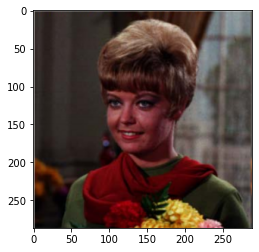

In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

**TRANSFORMASI LINIER BRIGHTNESS**

Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 50


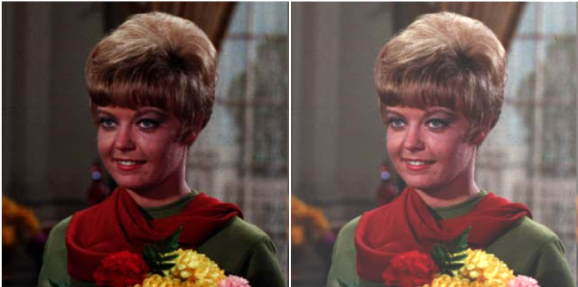

In [5]:
print('Mengubah tingkat kecerahan citra ')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

**TUGAS PRAKTIKUM**

1.Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:



Mengubah kontras dan tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan [-255 -255]: 60
Masukkan kontras [1.0 - 3.0]: 1.5


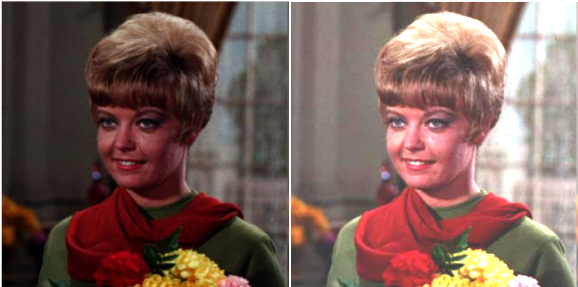

In [6]:
#Tugas Praktikum No 1
print('Mengubah kontras dan tingkat kecerahan citra ')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan [-255 -255]: '))
    contrast = float(input('Masukkan kontras [1.0 - 3.0]: ')) 
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

2.implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga
menghasilkan keluaran seperti berikut:



Mengubah tingkat kecerahan citra dengan Transformasi Log
---------------------------------
Masukkan nilai kecerahan: 40


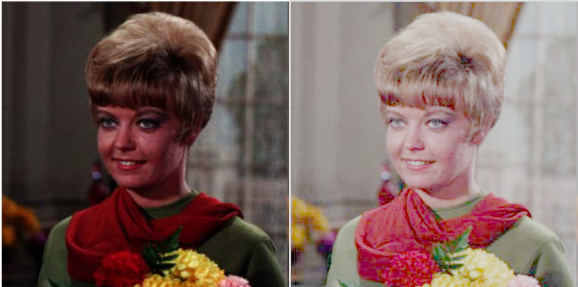

In [8]:
#Tugas Praktikum No 2
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(brightness * (np.log(1+original[y,x,c])), 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

3.Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:



**AVERAGING**

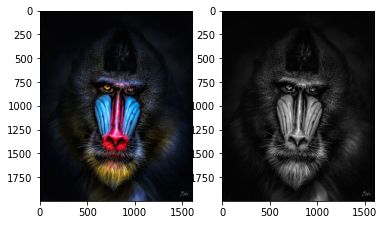

In [10]:
img_m = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img_rgb = cv.cvtColor(img_m,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
img_avg[:] = img_avg.mean(axis=-1, keepdims=1)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)               

**LIGHTNESS**

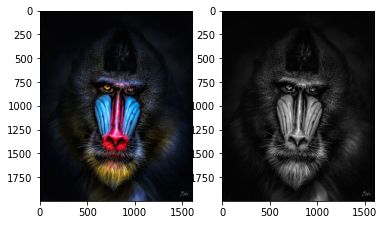

In [11]:
img_avg = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
img_avg[:] = np.max(img_avg,axis=-1,keepdims=10)/2+np.min(img_avg,axis=-1,keepdims=10)/2
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(img_avg)

**LUMINACE**

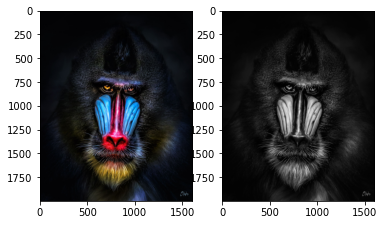

In [12]:
image_lum = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
R, G, B = image_lum[:,:,0], image_lum[:,:,1], image_lum[:,:,2]
gray_image_lum = (0.21 * R) + (0.72 * G) + (0.07 * B)
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(gray_image_lum, cmap='gray')

4.Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna merah pada citra masukan dan ubah bagian lain yang tidak berwarna merah menjadi grayscale seperti pada contoh berikut:



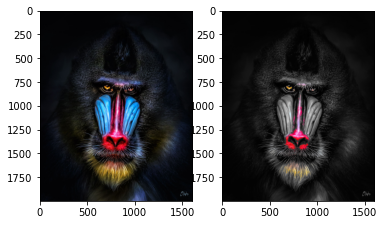

In [13]:
img_4 = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/mandrill.tiff')
ret, mask = cv.threshold(img_4[:,:,2], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(img_4)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(img_rgb, mask3)

gray = cv.cvtColor(img_4, cv.COLOR_BGR2GRAY)
img_4 = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(img_4, 255 - mask3)

out = gray + red

fig, ax = plt.subplots(1,2)
ax[0].imshow(img_rgb)
ax[1].imshow(out, cmap='gray')